In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data = pd.read_csv('./allMatch.csv')
data = data.loc[data["valid"] == True]
data["abs_diff"] = (data["epa"] - data['eia'])
count = len(data)
data = data.loc[(data["abs_diff"] < 25000) & (data["abs_diff"] > -25000)]
print("Percent between [-100000, 100000]:", (len(data)/count) * 100)

Percent between [-100000, 100000]: 53.47940403155127


In [121]:
data["abs_diff"].describe()

count    3051.000
mean     7586.124
std      7217.266
min         0.000
25%      1299.354
50%      5009.240
75%     12697.326
max     24984.250
Name: abs_diff, dtype: float64

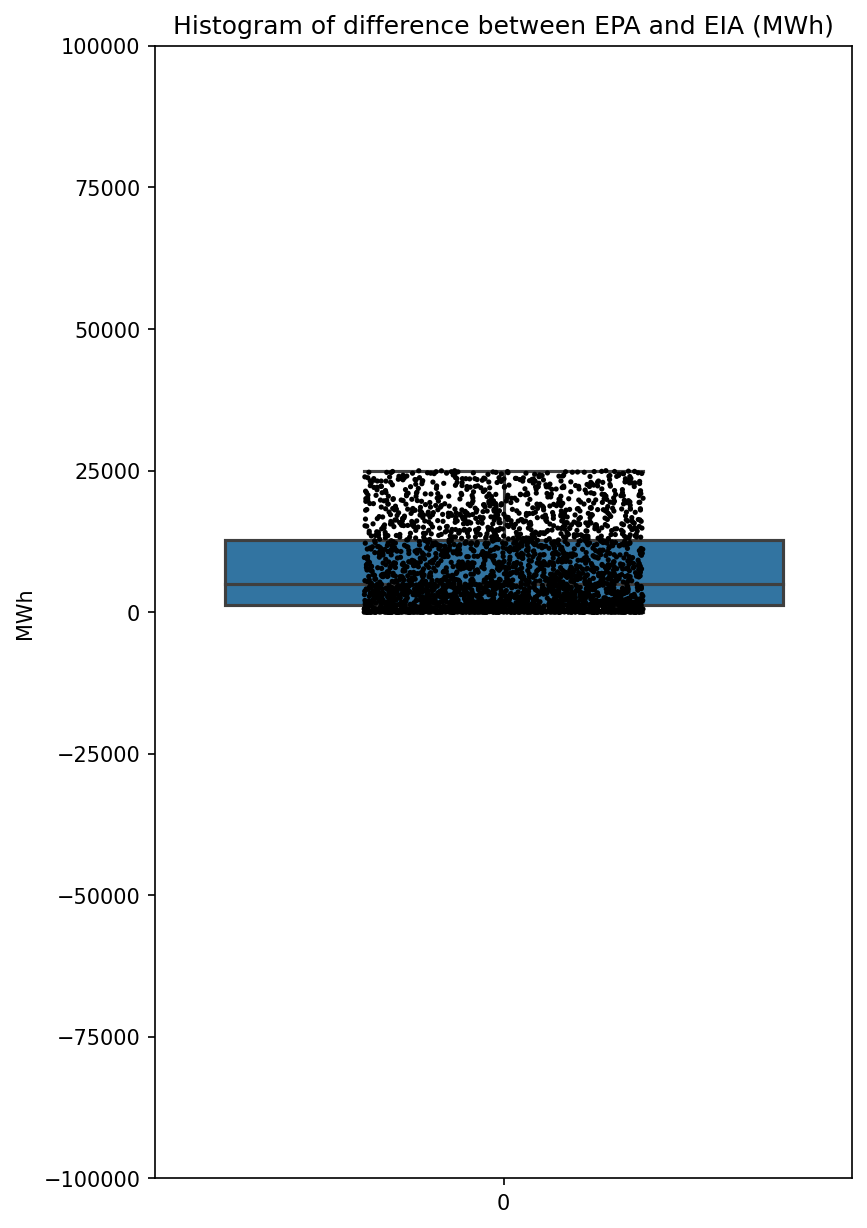

In [122]:
fig, ax = plt.subplots(figsize=(6,10), dpi=150)
ax = sns.boxplot(data=data["abs_diff"])
ax = sns.stripplot(data=data["abs_diff"], color="black", jitter=0.2, size=2.5)
plt.title("Histogram of difference between EPA and EIA (MWh)")
plt.ylabel("MWh")
#plt.yscale("log")
plt.ylim(-100000, 10**5)
plt.savefig('boxplot.png')

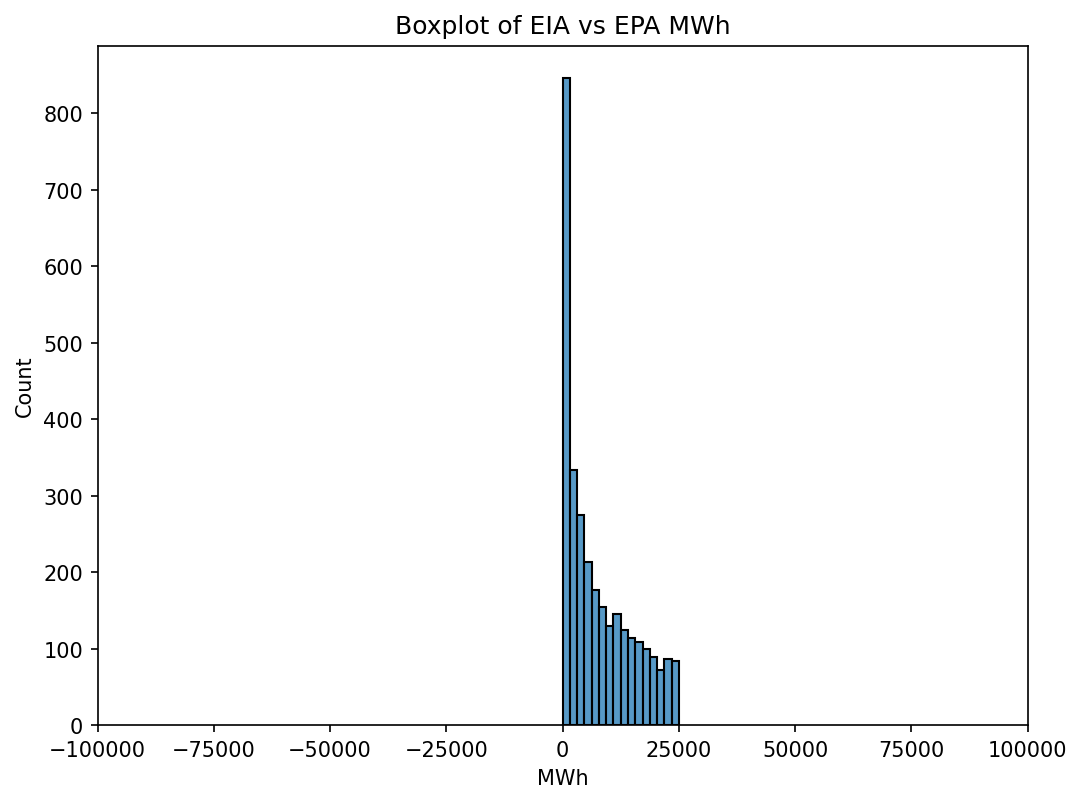

In [123]:
fig, ax = plt.subplots(figsize=(8,6), dpi=150)
ax = sns.histplot(data=data["abs_diff"])
plt.title("Boxplot of EIA vs EPA MWh")
plt.xlabel("MWh")
plt.xlim(-100000, 100000)
plt.savefig('hist.png')